In [1]:
import pandas_datareader as pdr

In [2]:
df=pdr.get_data_tiingo('AAPL',api_key="")

In [3]:
df.to_csv("tingo AAPL.csv")

In [4]:
import pandas as pd
df=pd.read_csv("tingo AAPL.csv")

In [5]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-11-20 00:00:00+00:00,117.34,118.7700,117.29,118.64,73604287,117.34,118.7700,117.29,118.64,73604287,0.0,1.0
1253,AAPL,2020-11-23 00:00:00+00:00,113.85,117.6202,113.75,117.18,127959318,113.85,117.6202,113.75,117.18,127959318,0.0,1.0
1254,AAPL,2020-11-24 00:00:00+00:00,115.17,115.8500,112.59,113.91,113226248,115.17,115.8500,112.59,113.91,113226248,0.0,1.0
1255,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.17,115.55,76499234,116.03,116.7500,115.17,115.55,76499234,0.0,1.0
1256,AAPL,2020-11-27 00:00:00+00:00,116.59,117.4900,116.22,116.57,46691331,116.59,117.4900,116.22,116.57,46691331,0.0,1.0


In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-02 00:00:00+00:00,116.28,118.11,116.08,117.05,33386563,26.929120,27.352927,26.882803,27.107443,133546252,0.0,1.0
1,AAPL,2015-12-03 00:00:00+00:00,115.20,116.79,114.22,116.55,41569509,26.679005,27.047230,26.452048,26.991649,166278036,0.0,1.0
2,AAPL,2015-12-04 00:00:00+00:00,119.03,119.25,115.11,115.29,57776977,27.565989,27.616938,26.658162,26.699848,231107908,0.0,1.0
3,AAPL,2015-12-07 00:00:00+00:00,118.28,119.86,117.81,118.98,32084249,27.392297,27.758207,27.283451,27.554409,128336996,0.0,1.0
4,AAPL,2015-12-08 00:00:00+00:00,118.23,118.60,116.86,117.52,34309450,27.380718,27.466406,27.063442,27.216290,137237800,0.0,1.0


In [7]:
# df1=df.reset_index()["close"]
df1=df.reset_index()['close']

In [8]:
df1

0       116.28
1       115.20
2       119.03
3       118.28
4       118.23
         ...  
1252    117.34
1253    113.85
1254    115.17
1255    116.03
1256    116.59
Name: close, Length: 1257, dtype: float64

In [9]:
import matplotlib.pyplot as plt


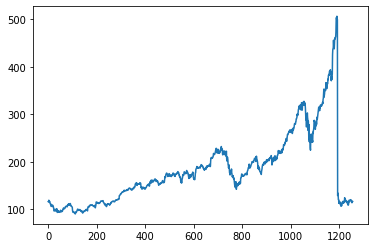

In [10]:
plt.plot(df1)

In [11]:
df1.shape

(1257,)

In [12]:
df1.isnull().sum()

0

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.06239327]
 [0.05979555]
 [0.06900782]
 ...
 [0.05972339]
 [0.06179194]
 [0.06313891]]


In [15]:

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train,test=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 440)

In [17]:
train.shape

(817, 1)

In [18]:
test.shape

(440, 1)

In [19]:
train

array([[0.06239327],
       [0.05979555],
       [0.06900782],
       [0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.04254961],
       [0.03963921],
       [0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.009

In [20]:
def createDataSet(df,timestep=1):
  x,y=[],[]
  for i in range(len(df)-timestep-1):
    x.append(df[i:timestep+i,0])
    y.append(df[timestep+i,0])
  return np.array(x),np.array(y)

In [21]:
timestep=100
x_train,y_train=createDataSet(train,timestep)
x_test,y_test=createDataSet(test,timestep)

In [22]:
print(x_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(x_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [24]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [25]:
x_train.shape

(716, 100, 1)

In [26]:
x_test.shape

(339, 100, 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [28]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0086 - val_loss: 0.0609
Epoch 2/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0023 - val_loss: 0.0233
Epoch 3/100
12/12 [==============================] - 0s 17ms/step - loss: 6.6527e-04 - val_loss: 0.0251
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 6.0314e-04 - val_loss: 0.0209
Epoch 5/100
12/12 [==============================] - 0s 17ms/step - loss: 4.5577e-04 - val_loss: 0.0205
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 3.7417e-04 - val_loss: 0.0196
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 3.5044e-04 - val_loss: 0.0189
Epoch 8/100
12/12 [==============================] - 0s 17ms/step - loss: 3.3733e-04 - val_loss: 0.0185
Epoch 9/100
12/12 [==============================] - 0s 17ms/step - loss: 3.2873e-04 - val_loss: 0.0177
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - los

In [30]:


### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [31]:
print(x_train.shape)
print(x_test.shape)

(716, 100, 1)
(339, 100, 1)


In [32]:
train_predict.shape

(716, 1)

In [33]:
test_predict

array([[0.28267685],
       [0.28386313],
       [0.2850089 ],
       [0.28582993],
       [0.28763187],
       [0.28861222],
       [0.2871093 ],
       [0.28041795],
       [0.27188823],
       [0.2646782 ],
       [0.26136422],
       [0.260846  ],
       [0.2618443 ],
       [0.2660953 ],
       [0.27036324],
       [0.2730599 ],
       [0.27550712],
       [0.27896234],
       [0.2828734 ],
       [0.2871253 ],
       [0.2908848 ],
       [0.290399  ],
       [0.2876077 ],
       [0.28331837],
       [0.27924085],
       [0.2773127 ],
       [0.27737015],
       [0.27771413],
       [0.27895975],
       [0.28209028],
       [0.2862677 ],
       [0.29069594],
       [0.29534   ],
       [0.3017439 ],
       [0.30858138],
       [0.31300545],
       [0.3149818 ],
       [0.3153173 ],
       [0.31538686],
       [0.31493455],
       [0.31305653],
       [0.3106594 ],
       [0.30810797],
       [0.30703446],
       [0.3070494 ],
       [0.30736068],
       [0.30940264],
       [0.312

In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

157.79303086199153

In [36]:
math.sqrt(mean_squared_error(y_test,test_predict))

274.0879719513858

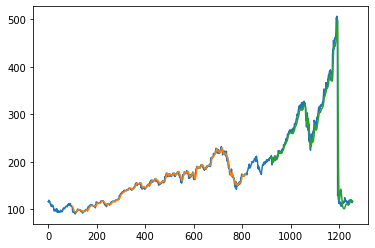

In [37]:

# shift train predictions for plotting
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test)

440

In [39]:
x_input=test[340:,].reshape(1,-1)

In [40]:
x_input.shape

(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.830811785929044,
 0.8378111846061336,
 0.841635598316296,
 0.8785808779314492,
 0.8517378232110644,
 0.8672760072158752,
 0.8350210463018641,
 0.8699939867708961,
 0.8892363199037885,
 0.8882501503307276,
 0.8853638003607938,
 0.89455201443175,
 0.8959470835838845,
 0.9206494287432352,
 0.9792904389657247,
 0.9936019242333134,
 0.9836680697534577,
 1.0,
 0.9854479855682503,
 0.983499699338545,
 0.09308478653036678,
 0.10544798556825014,
 0.09876127480457003,
 0.07345760673481655,
 0.07365003006614551,
 0.05407095610342749,
 0.06489476849067943,
 0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 

In [43]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.06164534]
101
1 day input [0.70556825 0.70131088 0.71651233 0.72293446 0.711365   0.70948888
 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876
 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118
 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105 0.86999399
 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943
 0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)